In [1]:
#https://github.com/ThilinaRajapakse/simpletransformers/blob/master/README.md#with-conda
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import string
from tqdm import tqdm_notebook as tqdm

from gensim.models import *

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.models import *
import keras.backend as K
from keras.utils import np_utils

from keras.callbacks import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras import regularizers
from numpy import array
from numpy import asarray
from numpy import zeros

Using TensorFlow backend.
/home/bharaj/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bharaj/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bharaj/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bharaj/anaconda3/lib/python3.6/site-packages/tenso

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
from simpletransformers.classification import ClassificationModel
import pandas as pd

I0211 10:25:02.014722 139752635905792 file_utils.py:35] PyTorch version 1.1.0 available.


In [4]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=25)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=15)
    plt.yticks(tick_marks, classes, fontsize=15)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize = 14)

    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

In [5]:
df = pd.read_csv('Tamil_first_ready_for_sentiment.csv',sep='\t',names=['category','text'])
y=df['category'].tolist()
X_train, X_test, y_train, y_test = train_test_split(df['text'].tolist(), y, random_state=5, test_size=0.2) #train, test split
#validation split
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=5, test_size=0.1)

In [6]:
list_of_class={'not-Tamil':0,'Positive':1,'Negative':2,'unknown state':3,'Mixed feelings':4}
y_val=[list_of_class[i.strip()]for i in y_val]
y_train=[list_of_class[i.strip()]for i in y_train]
y_test=[list_of_class[i.strip()]for i in y_test]

In [7]:
class_weights

array([1.76896067, 1.5616863 , 0.29691183, 6.34508816, 3.72082718])

In [8]:
# class_weights=[3.23783784, 1.797     , 0.48005343, 1.52503536, 0.71641196]
# class_weights

In [9]:
# Train and Evaluation data needs to be in a Pandas Dataframe containing at least two columns. If the Dataframe has a header, it should contain a 'text' and a 'labels' column. If no header is present, the Dataframe should contain at least two columns, with the first column is the text with type str, and the second column in the label with type int.
train_data = [['Example sentence belonging to class 1', 1], ['Example sentence belonging to class 0', 0], ['Example eval senntence belonging to class 2', 2]]
train_df = pd.DataFrame(train_data)

In [10]:
train_df

,0,1
0,Example sentence belonging to class 1,1
1,Example sentence belonging to class 0,0
2,Example eval senntence belonging to class 2,2


In [11]:
X_train

[' Trailer late ah parthavanga like podunga',
 ' Move pathutu vanthu trailer pakurvnga yaru',
 ' Puthupetai dhanush  ah yarellam pathinga',
 ' Dhanush oda character ,puthu sa erukay , mass ta',
 ' vera level ippa pesungada mokka nu thalaivaaaaaa',
 ' Thala mass . U1 bgm.     Vera level',
 ' ivara pathta death vadi madiri irukku',
 " 0:28 90's kids reference  Maadila irunthu kudicha Shakthiman kaapathvaaru",
 ' Aiyoo thala mass pannita thala',
 ' ENPT ku kaathu kadanthathellam oru nimishathula poiruchu',
 ' When Pandey gets up  Vandumurugan : IM SPEAKING.. NO CROSS SPEAKING... SITTT DOWNNN',
 ' Remake of Malayalam Mohanlal movie Devadoodhan',
 ' Tharamaana sirappaana sambavam inimeal ta paaka pora....',
 ' Viswasam trailer paathutu Inka vanthavanga like panuga',
 ' Maran  kattu kattitamnue verithanam thalivaaàa',
 ' Ella trailer la last la oru Mass dialouge vaichikuringaaa paaaa',
 ' Eppa Saamy thala padathula Vera director pera...pakurathu evalo periya santhosama iruku.....',
 ' En tha

In [12]:
df_train=pd.DataFrame(X_train,y_train)

In [13]:
df_valid=pd.DataFrame(X_val,y_val)
df_test=pd.DataFrame(X_test,y_test)

In [14]:
df_train

,0
1,Trailer late ah parthavanga like podunga
1,Move pathutu vanthu trailer pakurvnga yaru
1,Puthupetai dhanush ah yarellam pathinga
1,"Dhanush oda character ,puthu sa erukay , mass ta"
1,vera level ippa pesungada mokka nu thalaivaaaaaa
1,Thala mass . U1 bgm. Vera level
2,ivara pathta death vadi madiri irukku
1,0:28 90's kids reference Maadila irunthu kud...
1,Aiyoo thala mass pannita thala
4,ENPT ku kaathu kadanthathellam oru nimishathu...


In [15]:
df_train.to_csv('Tamil_Code_Mix_train.csv',sep='\t',header=False)
df_valid.to_csv('Tamil_Code_Mix_val.csv',sep='\t',header=False)
df_test.to_csv('Tamil_Code_Mix_test.csv',sep='\t',header=False)

In [16]:
df_train=pd.read_csv('Tamil_Code_Mix_train.csv',sep='\t',names=['category','text'])
df_test=pd.read_csv('Tamil_Code_Mix_test.csv',sep='\t',names=['category','text'])
df_valid=pd.read_csv('Tamil_Code_Mix_val.csv',sep='\t',names=['category','text'])

In [17]:
#df_valid=pd.read_csv('Malayalam_Code_Mix_val.csv',sep='\t',names=['f','m'])
df_valid=df_valid[['text','category']]
df_train=df_train[['text','category']]
df_test=df_test[['text','category']]
#df_valid

In [18]:
model = ClassificationModel('bert', 'bert-base-multilingual-cased', num_labels=5, args={'reprocess_input_data': True, 'overwrite_output_dir': True}) 
# You can set class weights by using the optional weight argument

I0211 10:25:03.160184 139752635905792 configuration_utils.py:185] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-multilingual-cased-config.json from cache at /home/bharaj/.cache/torch/transformers/45629519f3117b89d89fd9c740073d8e4c1f0a70f9842476185100a8afe715d1.893eae5c77904d1e9175faf98909639d3eb20cc7e13e2be395de9a0d8a0dad52
I0211 10:25:03.162360 139752635905792 configuration_utils.py:199] Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "directionality": "bidi",
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 5,

In [19]:
model.train_model(df_train)

Converting to features started. Cache is not used.


/home/bharaj/anaconda3/lib/python3.6/site-packages/simpletransformers/classification/classification_model.py:237: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


A Jupyter Widget


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


A Jupyter Widget

A Jupyter Widget

Running loss: 1.735620Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 1.510034Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 16384.0
Running loss: 0.907657Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 8192.0
Running loss: 1.442259

I0211 10:34:19.517261 139752635905792 configuration_utils.py:87] Configuration saved in outputs/checkpoint-1417-epoch-1/config.json


I0211 10:34:26.305118 139752635905792 modeling_utils.py:258] Model weights saved in outputs/checkpoint-1417-epoch-1/pytorch_model.bin
I0211 10:34:26.534862 139752635905792 configuration_utils.py:87] Configuration saved in outputs/config.json


I0211 10:34:33.035523 139752635905792 modeling_utils.py:258] Model weights saved in outputs/pytorch_model.bin


Training of bert model complete. Saved to outputs/.


In [20]:
result, model_outputs, wrong_predictions = model.eval_model(df_valid)

/home/bharaj/anaconda3/lib/python3.6/site-packages/simpletransformers/classification/classification_model.py:568: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Features loaded from cache at cache_dir/cached_dev_bert_128_5_1260


A Jupyter Widget


{'mcc': 0.2191250717811231, 'eval_loss': 0.893118800241736}


In [21]:
predictions, raw_outputs = model.predict(df_test['text'])

Features loaded from cache at cache_dir/cached_dev_bert_128_5_3149


A Jupyter Widget

In [22]:
predictions


array([1, 1, 1, ..., 1, 1, 1])

In [23]:
list_of_class_v={0:'not-Tamil',1:'Positive',2:'Negative',3:'unknown state',4:'Mixed feelings'}

In [24]:
print(classification_report([list_of_class_v[i] for i in y_test], 
                            [list_of_class_v[i] for i in predictions]))

                precision    recall  f1-score   support

Mixed feelings       0.00      0.00      0.00       377
      Negative       0.42      0.03      0.05       424
      Positive       0.68      0.99      0.80      2075
     not-Tamil       0.60      0.65      0.62       100
 unknown state       0.00      0.00      0.00       173

     micro avg       0.67      0.67      0.67      3149
     macro avg       0.34      0.33      0.29      3149
  weighted avg       0.52      0.67      0.56      3149



/home/bharaj/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


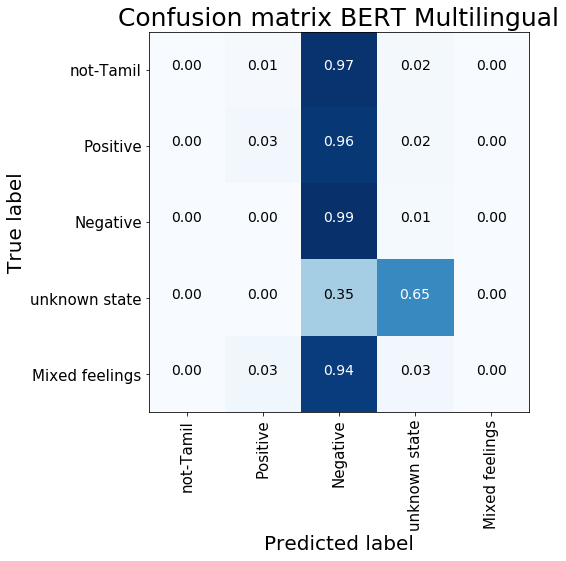

In [25]:
cnf_matrix = confusion_matrix([list_of_class_v[i] for i in y_test], 
                              [list_of_class_v[i] for i in predictions])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(list_of_class_v.values()), title="Confusion matrix BERT Multilingual")
plt.show()

# BERT

In [26]:
model = ClassificationModel('bert', 'bert-base-cased', num_labels=5, args={'reprocess_input_data': True, 'overwrite_output_dir': True}) 
# You can set class weights by using the optional weight argument


I0211 10:35:14.519652 139752635905792 configuration_utils.py:185] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/bert-base-cased-config.json from cache at /home/bharaj/.cache/torch/transformers/b945b69218e98b3e2c95acf911789741307dec43c698d35fad11c1ae28bda352.3d5adf10d3445c36ce131f4c6416aa62e9b58e1af56b97664773f4858a46286e
I0211 10:35:14.521729 139752635905792 configuration_utils.py:199] Model config {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "is_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "num_labels": 5,
  "output_attentions": false,
  "output_

In [27]:
model.train_model(df_train)


Converting to features started. Cache is not used.


/home/bharaj/anaconda3/lib/python3.6/site-packages/simpletransformers/classification/classification_model.py:237: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


A Jupyter Widget


Selected optimization level O1:  Insert automatic casts around Pytorch functions and Tensor methods.

Defaults for this optimization level are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic
Processing user overrides (additional kwargs that are not None)...
After processing overrides, optimization options are:
enabled                : True
opt_level              : O1
cast_model_type        : None
patch_torch_functions  : True
keep_batchnorm_fp32    : None
master_weights         : None
loss_scale             : dynamic


A Jupyter Widget

A Jupyter Widget

Running loss: 1.214257Gradient overflow.  Skipping step, loss scaler 0 reducing loss scale to 32768.0
Running loss: 1.045378

I0211 10:44:49.184058 139752635905792 configuration_utils.py:87] Configuration saved in outputs/checkpoint-1417-epoch-1/config.json


I0211 10:44:53.072467 139752635905792 modeling_utils.py:258] Model weights saved in outputs/checkpoint-1417-epoch-1/pytorch_model.bin
I0211 10:44:53.331390 139752635905792 configuration_utils.py:87] Configuration saved in outputs/config.json


I0211 10:44:57.238466 139752635905792 modeling_utils.py:258] Model weights saved in outputs/pytorch_model.bin


Training of bert model complete. Saved to outputs/.


In [28]:
#model.save('BERT_BASE_TAMIL.h5') 

In [29]:
result, model_outputs, wrong_predictions = model.eval_model(df_valid)


/home/bharaj/anaconda3/lib/python3.6/site-packages/simpletransformers/classification/classification_model.py:568: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Features loaded from cache at cache_dir/cached_dev_bert_128_5_1260


A Jupyter Widget

RuntimeError: cublas runtime error : the GPU program failed to execute at /opt/conda/conda-bld/pytorch_1556653183467/work/aten/src/THC/THCBlas.cu:315

In [ ]:
predictions, raw_outputs = model.predict(df_test['text'])
print(classification_report([list_of_class_v[i] for i in y_test], 
                            [list_of_class_v[i] for i in predictions]))
cnf_matrix = confusion_matrix([list_of_class_v[i] for i in y_test], 
                              [list_of_class_v[i] for i in predictions])

plt.figure(figsize=(7,7))
plot_confusion_matrix(cnf_matrix, classes=list(diz_label.values()), title="Confusion matrix BERT")
plt.show()